In [1]:
## note these to add w/Poetry to the Dockerfile
%pip install pandas
%pip install networkx
%pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
from tensorflow.keras.layers import Dense, Multiply, Add
from tensorflow.keras import Model
from tensorflow.keras.constraints import NonNeg 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
url = 'http://cs.bc.edu/~prudhome/AAPLD/animal-similarity.csv'

raw_dataset = pd.read_csv(url, index_col=0)
list_of_animal_pairs = raw_dataset.index.str.split('~')

In [4]:
animal_pair_data = pd.DataFrame.from_records(list_of_animal_pairs, columns=['first_animal', 'second_animal'], index= raw_dataset.index)

In [5]:
animal_pair_data.sort_values(by = ['first_animal', 'second_animal'], inplace=True)

In [6]:
unique_animals = set(animal_pair_data.first_animal).union(animal_pair_data.second_animal)

In [7]:
animal_pairs = nx.Graph()
animal_pairs.add_nodes_from(unique_animals)
animal_pairs.add_edges_from(list_of_animal_pairs)

In [8]:
low_degree=[k for k,v in animal_pairs.degree._nodes.items() if len(v) < 32]

In [9]:
animal_pairs.remove_nodes_from(low_degree)

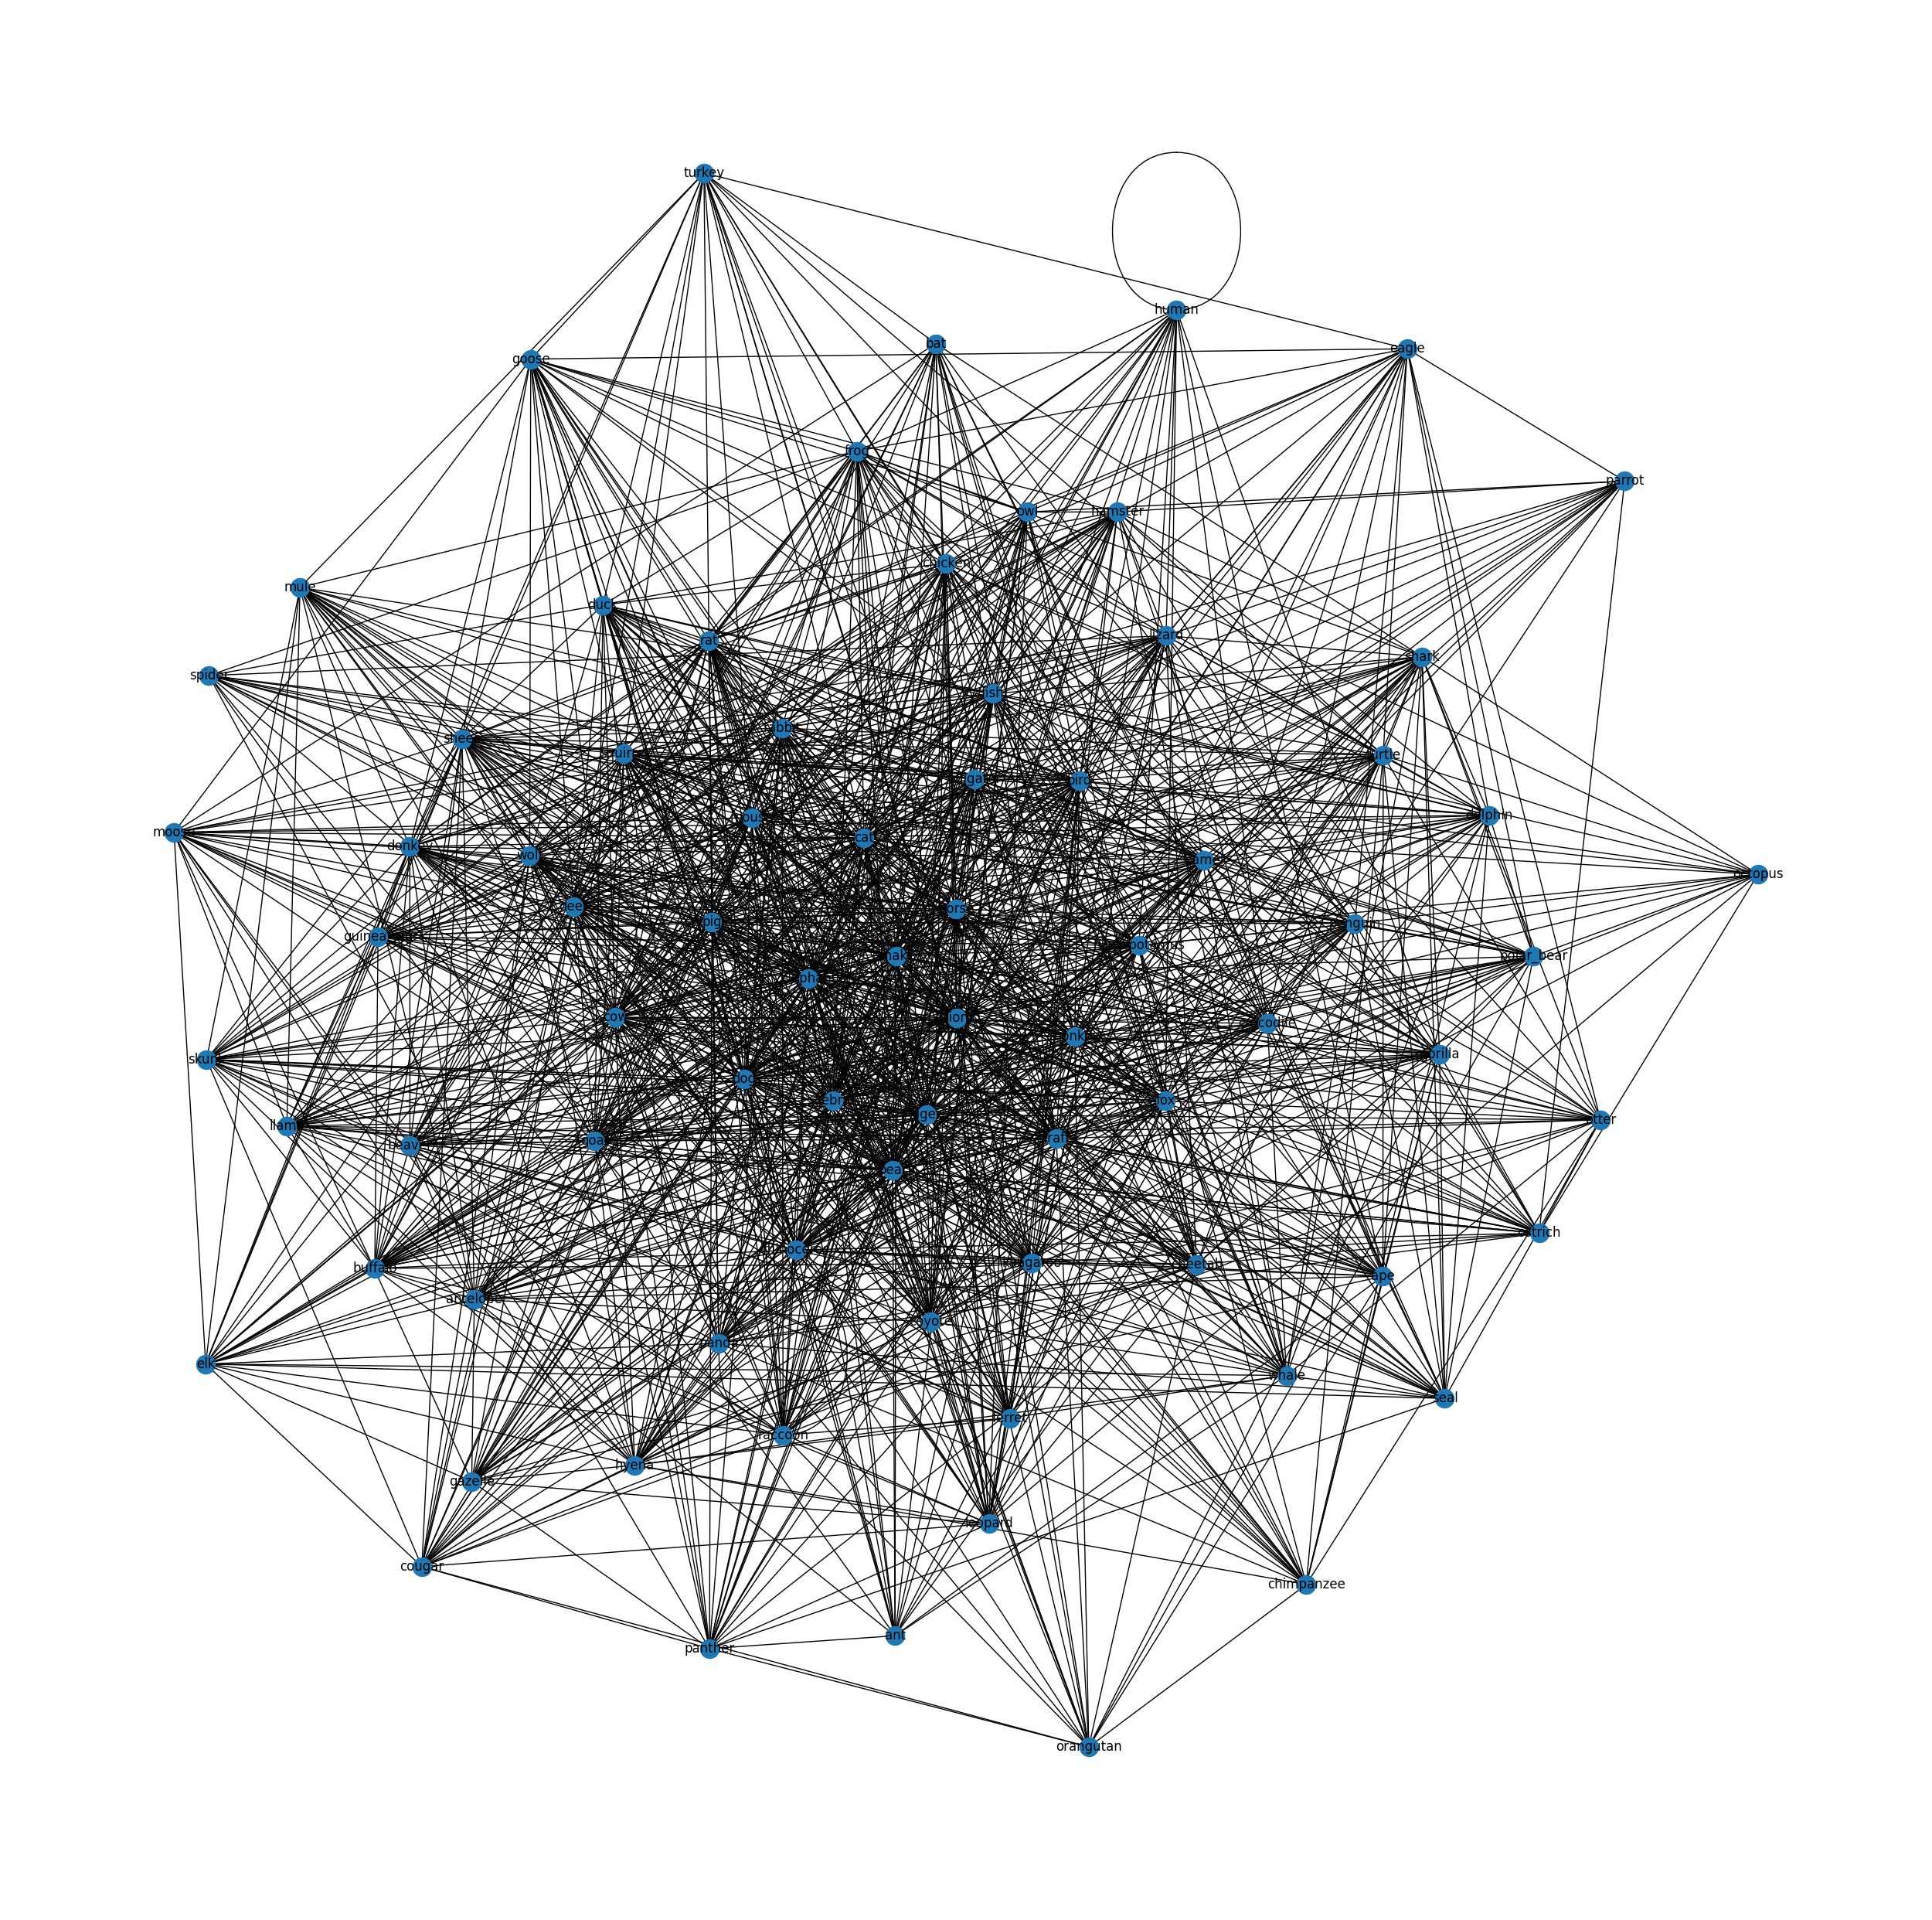

In [10]:
fig, ax = plt.subplots(figsize=(32,32))
nx.draw(animal_pairs, with_labels=True, ax=ax)

plt.show()

In [11]:
connected_list = [x for x in animal_pairs.nodes]

In [12]:
# try the small list, or, failing that, just the apes

In [13]:
smaller_animal_pair_data=animal_pair_data.loc[animal_pair_data['first_animal' ].isin( connected_list) & animal_pair_data['second_animal' ].isin( connected_list) ] 

In [14]:
joined_data=smaller_animal_pair_data.join(raw_dataset).drop(columns='[All_Ratings]')

In [15]:
big_matrix = pd.DataFrame(index=connected_list, columns = connected_list)

In [16]:
joined_data

first_animal second_animal  Average_Rating
Pair                                                         
alligator~antelope    alligator      antelope           1.940
alligator~bird        alligator          bird           2.080
alligator~buffalo     alligator       buffalo           1.080
alligator~elephant    alligator      elephant           1.140
alligator~fish        alligator          fish           1.000
...                         ...           ...             ...
zebra~seal                zebra          seal           1.040
zebra~shark               zebra         shark           1.067
zebra~snake               zebra         snake           1.880
zebra~tiger               zebra         tiger           2.720
zebra~turtle              zebra        turtle           1.120

[1601 rows x 3 columns]

In [17]:
#TODO wrap below section into functions

In [18]:
for row in joined_data.iterrows():
    big_matrix.loc[row[1].first_animal][row[1].second_animal] = row[1].Average_Rating
    big_matrix.loc[row[1].second_animal][row[1].first_animal] = row[1].Average_Rating

In [19]:
big_matrix = big_matrix.astype(float)

In [20]:
# big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.5]
# big_matrix = big_matrix[big_matrix.index.to_list()]

In [21]:
big_matrix = big_matrix[big_matrix.isna().mean(1) < 0.33]

In [22]:
big_matrix = big_matrix[big_matrix.index.to_list()]

In [23]:
plt.matshow(big_matrix)

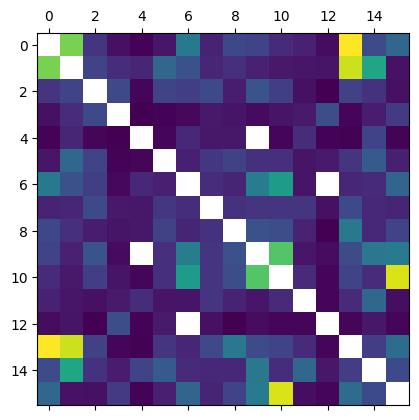

In [24]:
plt.show()

In [25]:
big_matrix.isna().mean(1)

tiger       0.0625
cat         0.0625
bear        0.0625
snake       0.0625
bird        0.1250
pig         0.0625
cow         0.1250
elephant    0.0625
giraffe     0.0625
deer        0.1250
horse       0.0625
monkey      0.0625
fish        0.1250
lion        0.0625
dog         0.0625
zebra       0.0625
dtype: float64

In [26]:
big_matrix.shape

(16, 16)

In [27]:
big_matrix

tiger    cat   bear  snake  bird    pig    cow  elephant  giraffe  \
tiger       NaN  5.160  1.780   1.24  1.06  1.320  3.117     1.500    2.125   
cat       5.160    NaN  2.080   1.66  1.56  2.717  2.300     1.560    1.700   
bear      1.780  2.080    NaN   2.16  1.10  2.080  1.960     2.160    1.425   
snake     1.240  1.660  2.160    NaN  1.00  1.060  1.110     1.360    1.300   
bird      1.060  1.560  1.100   1.00   NaN  1.100  1.580     1.340    1.340   
pig       1.320  2.717  2.080   1.06  1.10    NaN  1.460     1.840    2.020   
cow       3.117  2.300  1.960   1.11  1.58  1.460    NaN     1.683    1.540   
elephant  1.500  1.560  2.160   1.36  1.34  1.840  1.683       NaN    1.740   
giraffe   2.125  1.700  1.425   1.30  1.34  2.020  1.540     1.740      NaN   
deer      2.040  1.480  2.360   1.16   NaN  1.700  3.220     1.800    2.300   
horse     1.620  1.360  1.960   1.30  1.08  1.720  3.860     1.800    2.250   
monkey    1.480  1.320  1.240   1.38  1.68  1.280  1.290     1.810    1.500   
fish      1.180  1.300  1.000   2.26  1.06  1.370    NaN     1.240    1.020   
lion      6.220  5.820  2.020   1.10  1.04  1.780  1.560     2.160    3.100   
dog       2.200  4.080  1.760   1.42  2.05  2.480  1.620     1.600    1.600   
zebra     2.720  1.260  1.240   1.88  1.06  1.460  2.700     1.550    2.040   

          deer  horse  monkey   fish   lion    dog  zebra  
tiger     2.04  1.620    1.48  1.180  6.220  2.200  2.720  
cat       1.48  1.360    1.32  1.300  5.820  4.080  1.260  
bear      2.36  1.960    1.24  1.000  2.020  1.760  1.240  
snake     1.16  1.300    1.38  2.260  1.100  1.420  1.880  
bird       NaN  1.080    1.68  1.060  1.040  2.050  1.060  
pig       1.70  1.720    1.28  1.370  1.780  2.480  1.460  
cow       3.22  3.860    1.29    NaN  1.560  1.620  2.700  
elephant  1.80  1.800    1.81  1.240  2.160  1.600  1.550  
giraffe   2.30  2.250    1.50  1.020  3.100  1.600  2.040  
deer       NaN  4.820    1.32  1.180  2.200  3.060  3.180  
horse     4.82    NaN    1.64  1.100  2.040  1.660  5.917  
monkey    1.32  1.640     NaN  1.100  1.640  2.720  1.200  
fish      1.18  1.100    1.10    NaN  1.067  1.340  1.080  
lion      2.20  2.040    1.64  1.067    NaN  1.940  2.840  
dog       3.06  1.660    2.72  1.340  1.940    NaN  2.175  
zebra     3.18  5.917    1.20  1.080  2.840  2.175    NaN

In [28]:
# todo make into function
similarities = big_matrix.to_numpy()
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]

In [29]:
# FIll in NA's 

In [30]:
similarity_vec = np.nan_to_num(similarity_vec, nan=min(similarity_vec))

In [31]:
dissimilarity_vec = np.exp(-1*similarity_vec)

In [32]:
len(dissimilarity_vec) 
# :=Y  = n(n-1)/2
# 2Y = n^2 - n
# 0 = n^2 - n - 2Y

# 0 = (n - 1/2) ^2 - 1/4 - 2Y 
# 2Y + 1/4 = (n - 1/2)^2
# N = 1/2 + sqrt(2Y + 1/4)


120

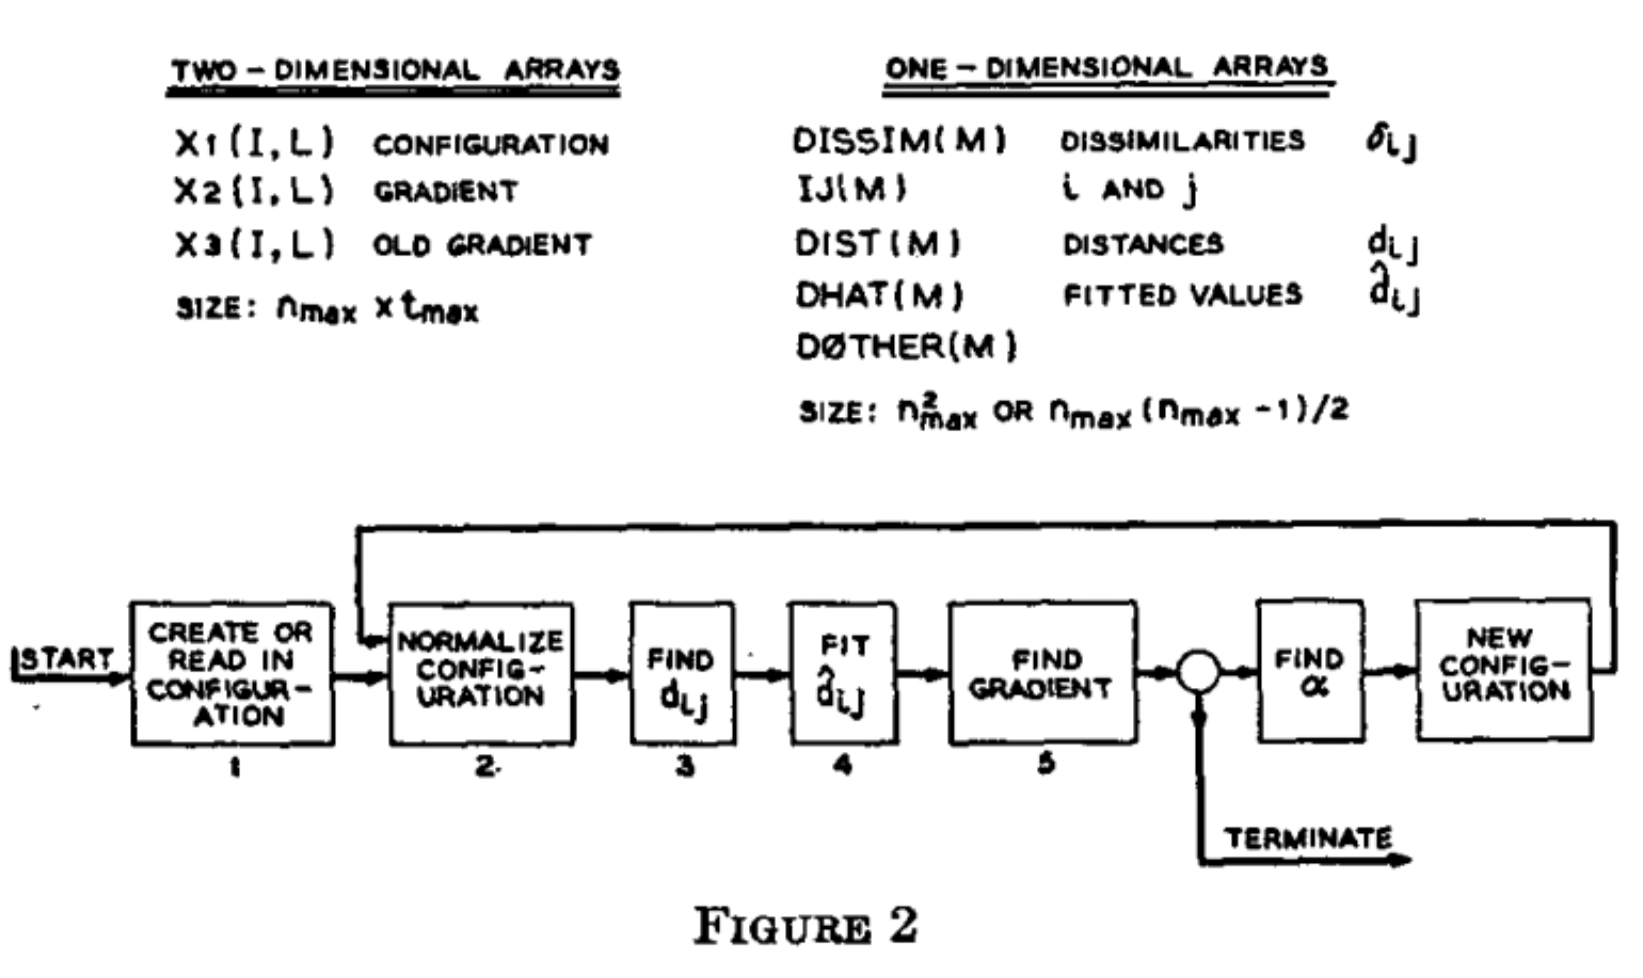
From Kruskal, 1964

Idea is to follow these steps, 

In [33]:
def generate_starting_configuration(dis_vec, n_points, dim=2):
    ## Generate kruskal_style t-dimensional starting configuration
    #  N = 1/2 + sqrt(2Y + 1/4)

    assert n_points == int(1/2 + np.sqrt(2*len(dis_vec) +1/4))
    
    max_multiplier = n_points//dim + 2
    #say 503 points in2 dim, then we need 252 diags, drop the last row of the last one , s0 have to go from 
    # 1 to n_points/dim +2
    starting_config = np.vstack([np.diag(j*np.ones(dim)) for j in range(1,max_multiplier)])
    return starting_config[:n_points,:]


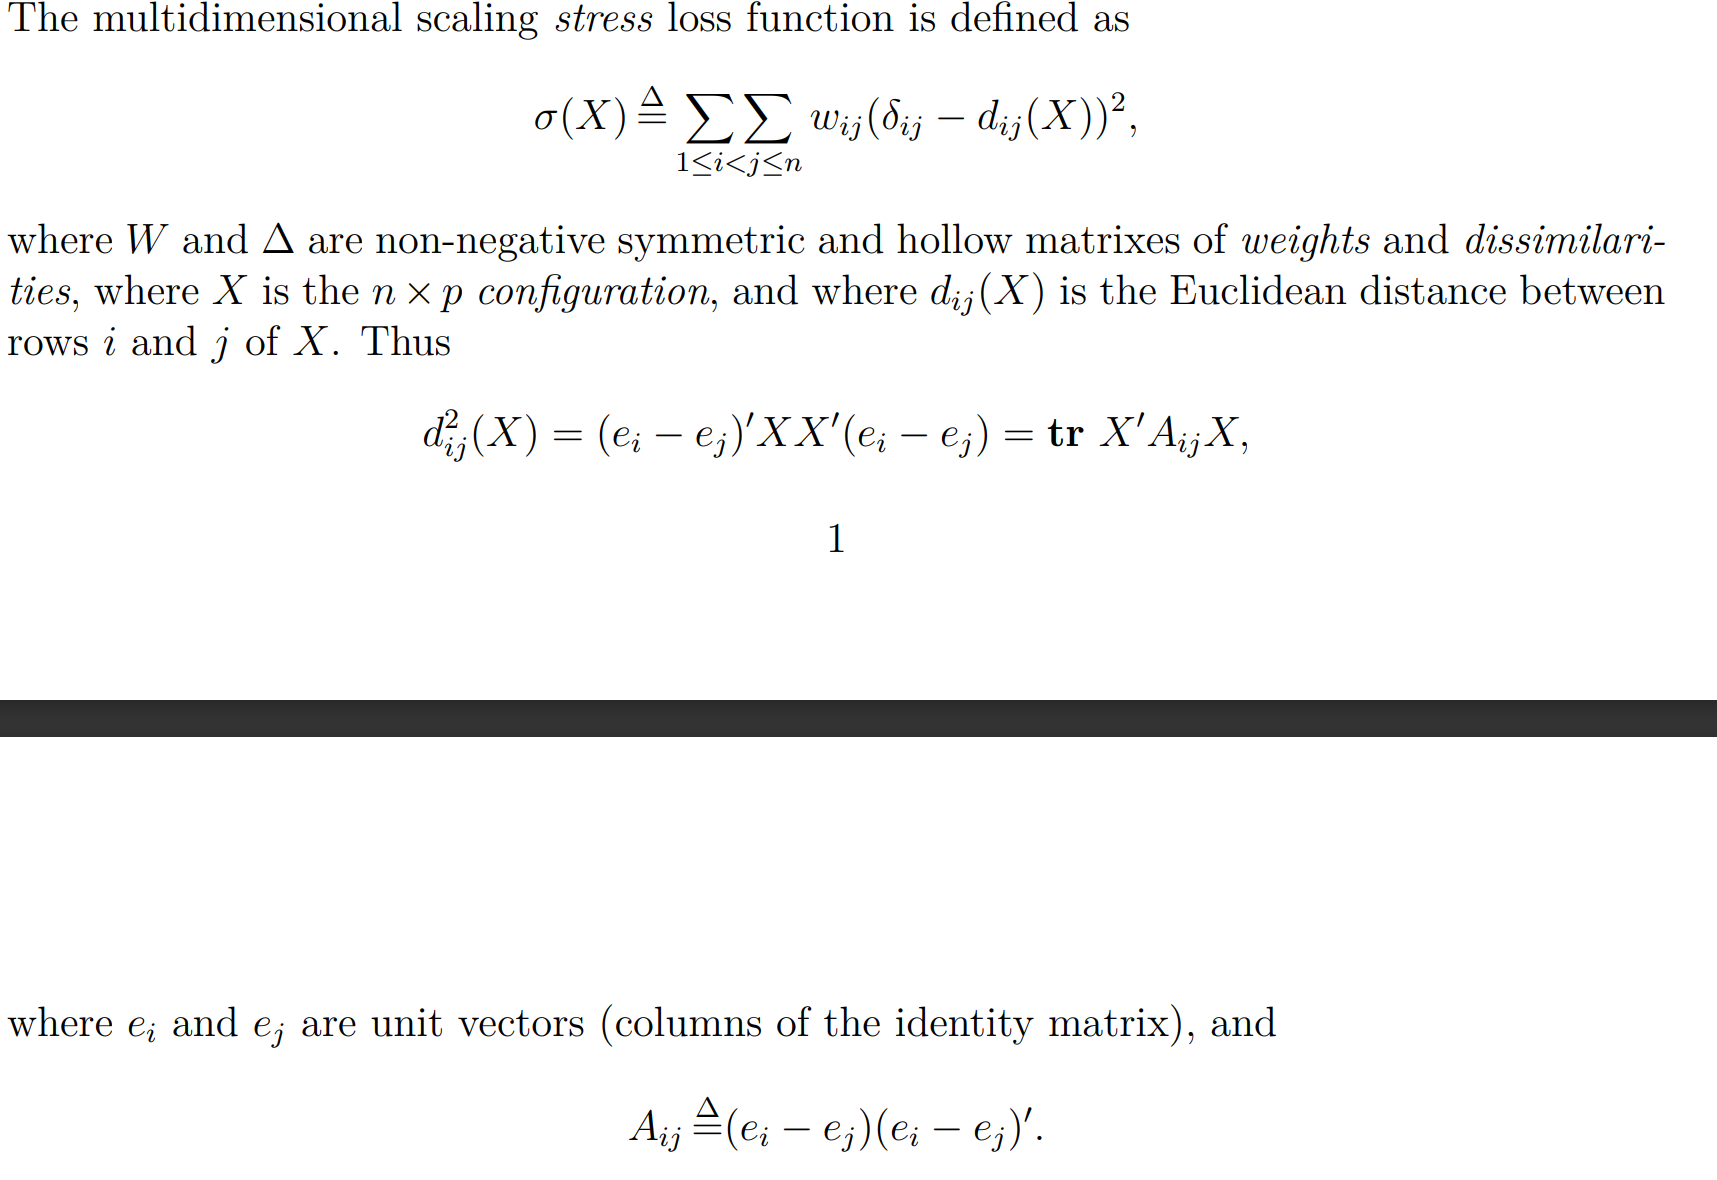
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/
NB: $\delta_{ij}$ here is the true dissimilarity between $i$ and $j$ 

In [34]:
## TODO move to matrix_utils.py 
## MAYBE rewrite in pure tensorflow
### need config_dim 
### -> then apply np.outer on each to get Aij
def self_outer(basis_vector:np.array)->np.array:
    return np.outer(basis_vector, basis_vector)
    

def pairwise_basis_diffs(max_index:int, max_rows:int)->np.array:
  
    assert max_index > 1 ## ignore first basis vector  
    eye_ref = np.eye(N=max_rows, M = max_index)
    
    # for index i and all other indices j less than it , build a 2-d array of (e_is - e_js)s
    # by subtracting highest indexed basis vector from all other basis vectors 
    ei_minus_ejs = eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)
    # find outer-product with self for each difference of basis columns (these are the A_ij s) 
    # where i is fixed at index 
    outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)
    return outer_list 
### then apply func1d on Aijs 
def pairwise_dist_block_chunk(outer_distance:np.array, configuration:np.array):
    # Compute tr X'A_ij X 
    return np.trace(configuration.T @ outer_distance @ configuration)
    
## then, use listcomp to get chunk of pairwise distances and vstack the pairwise distances 
def pairwise_dist_within_block(outer_list:np.array, configuration:np.array)->np.array:
    pairwise_dist_in_block = [pairwise_dist_block_chunk(outer_list[:,:,k], configuration) for k in range(outer_list.shape[2]) ]
    return np.array(pairwise_dist_in_block)

def pairwise_dists_of_block(index:int, configuration:np.array)->np.array:
    outerL = pairwise_basis_diffs(index, configuration.shape[0])
    return pairwise_dist_within_block(outerL, configuration)

## wrap 
def get_pairwise_distances(configuration):
    ## Wrapper for pairwise distance function (if prep needed)
    return np.hstack([pairwise_dists_of_block(i, configuration) for  i in range(2, configuration.shape[0]+1)])



In [35]:
## todo move to pdistlayer.py
## convert to tensorflow
def tf_get_pw_dist(tensorconfig:tf.Tensor)->tf.Tensor:
    dhat = tf.expand_dims(tf.py_function(func = get_pairwise_distances, inp = [tensorconfig], Tout=tf.float64, name="pairwise_dist"),-1)
    return dhat

In [36]:
## wrap pairwise distance in a layer
class PDistLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PDistLayer, self).__init__()
        
    def call(self, inputs):
        return tf_get_pw_dist(inputs)

In [37]:
#todo move to mdsmodel.py
class MDSModel(Model):
    def __init__(self,configuration):
        super(MDSModel, self).__init__()
        self.config = tf.Variable(configuration)
    
        self.distance = PDistLayer()
        self.d1 = Dense(128, activation='relu', kernel_constraint=NonNeg())
        self.d2 = Dense(1, activation='relu', kernel_constraint=NonNeg())

    def call(self, x):
        #nb we are throwing away x here 
        x = Multiply()([tf.ones_like(self.config), self.config])
        x = self.distance(x)
        x = self.d1(x)
        x = self.d2(x)
        return x

# Create an instance of the model


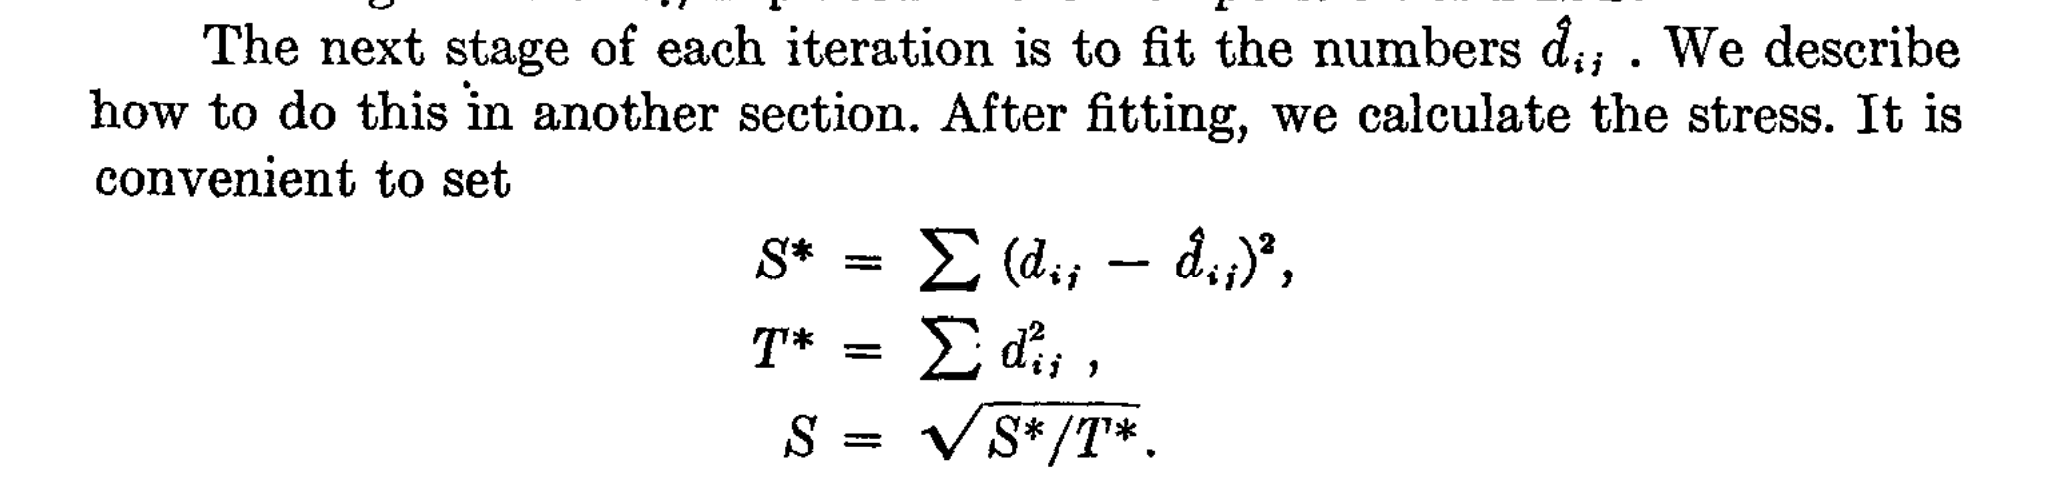
Stress Loss function from Kruskal, 1964

In [38]:
def stress(y_true, y_pred):
    Sstar = tf.math.reduce_sum(tf.math.square(y_true - y_pred),axis=-1)
    Tstar = tf.math.reduce_sum(tf.square(y_true),axis=-1)
    S = tf.math.sqrt(tf.math.divide_no_nan(Sstar,Tstar))
    return S  # Note the `axis=-1`



In [39]:
stress(tf.constant((1,3,3.)), tf.constant((6.,4,2)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.1920791>

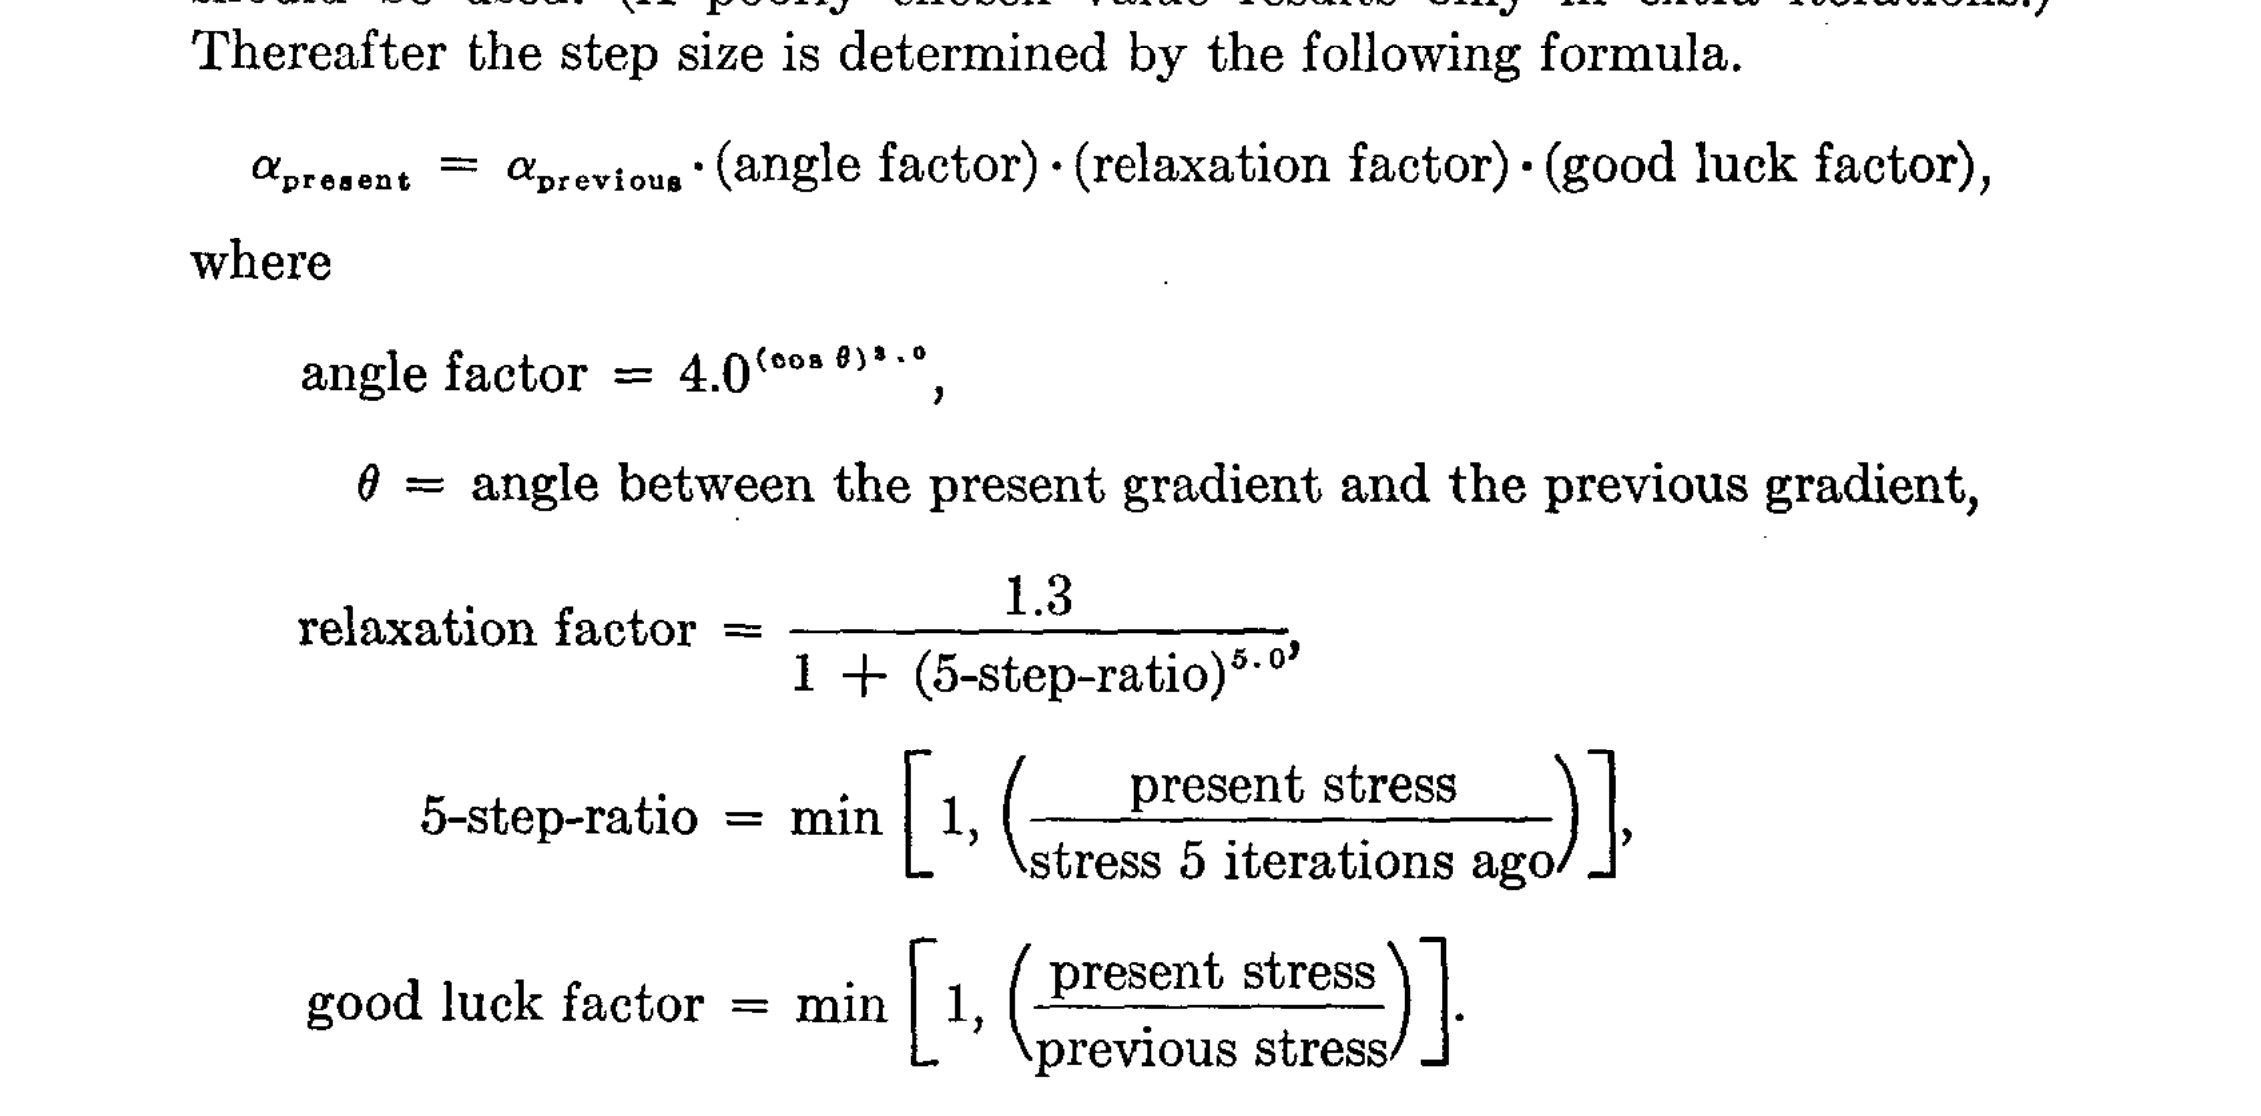
Optimizer from Kruskal, 1964

In [40]:
# todo make doctest for relevant fxs
index = 5
max_rows = 19
fake_dist_vec = np.ones(((max_rows**2 - max_rows)//2, 1))
eye_ref = np.eye(N=max_rows, M = index)
ei_minus_ejs =  eye_ref[:,:-1] - eye_ref[:,-1].reshape(max_rows,1)


In [41]:
test_outer = np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3])
test_config = generate_starting_configuration(fake_dist_vec, max_rows)
outer_list = np.apply_along_axis(func1d=self_outer, axis=0, arr=ei_minus_ejs)

In [42]:
pairwise_dist_over_chunks = [pairwise_dist_block_chunk(outer_list[:,:,k], test_config) for k in range(outer_list.shape[2]) ]


In [43]:
pairwise_dist_over_chunks

[4.0, 10.0, 1.0, 13.0]

In [44]:
pairwise_dists_of_block(4, test_config)

array([5., 1., 8.])

In [45]:
np.array_equal(outer_list[:,:,3], np.outer(ei_minus_ejs[:,3],ei_minus_ejs[:,3]))

True

In [46]:
len(get_pairwise_distances(test_config))

171

In [47]:
len(fake_dist_vec)

171

In [48]:
tf_config = tf.convert_to_tensor(test_config)
tf_get_pw_dist(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  2.],
       [  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
     

In [49]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



In [50]:
start_config = generate_starting_configuration(dissimilarity_vec, len(big_matrix.index))


In [51]:
disty = PDistLayer()

In [52]:
disty(tf_config)

<tf.Tensor: shape=(171, 1), dtype=float64, numpy=
array([[  2.],
       [  1.],
       [  5.],
       [  5.],
       [  1.],
       [  8.],
       [  4.],
       [ 10.],
       [  1.],
       [ 13.],
       [ 10.],
       [  4.],
       [ 13.],
       [  1.],
       [ 18.],
       [  9.],
       [ 17.],
       [  4.],
       [ 20.],
       [  1.],
       [ 25.],
       [ 17.],
       [  9.],
       [ 20.],
       [  4.],
       [ 25.],
       [  1.],
       [ 32.],
       [ 16.],
       [ 26.],
       [  9.],
       [ 29.],
       [  4.],
       [ 34.],
       [  1.],
       [ 41.],
       [ 26.],
       [ 16.],
       [ 29.],
       [  9.],
       [ 34.],
       [  4.],
       [ 41.],
       [  1.],
       [ 50.],
       [ 25.],
       [ 37.],
       [ 16.],
       [ 40.],
       [  9.],
       [ 45.],
       [  4.],
       [ 52.],
       [  1.],
       [ 61.],
       [ 37.],
       [ 25.],
       [ 40.],
       [ 16.],
       [ 45.],
       [  9.],
       [ 52.],
       [  4.],
     

In [53]:
Multiply()([tf.ones_like(tf_config), tf_config])

<tf.Tensor: shape=(19, 2), dtype=float32, numpy=
array([[ 1.,  0.],
       [ 0.,  1.],
       [ 2.,  0.],
       [ 0.,  2.],
       [ 3.,  0.],
       [ 0.,  3.],
       [ 4.,  0.],
       [ 0.,  4.],
       [ 5.,  0.],
       [ 0.,  5.],
       [ 6.,  0.],
       [ 0.,  6.],
       [ 7.,  0.],
       [ 0.,  7.],
       [ 8.,  0.],
       [ 0.,  8.],
       [ 9.,  0.],
       [ 0.,  9.],
       [10.,  0.]], dtype=float32)>

In [54]:
# plt.scatter(dhat, dissimilarity_vec)
# plt.show()

In [55]:
# configuration.shape

In [56]:
# np.mean(configuration,0)

In [57]:
# configuration

In [58]:
## Training loop
N_EPOCHS = 20


In [59]:
# The monotone regression: wrap in function
configuration = deepcopy(start_config)
model = MDSModel(configuration)
model.compile(optimizer='adam', loss=stress)
loss_object = stress

In [60]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [66]:
@tf.function
def train_step(config, dis_vec):
    with tf.GradientTape(persistent=False) as tape:
#         tape.watch(config)
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model([0], training=True)
        print("made predictions")
        loss = loss_object(dis_vec, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    return predictions 

In [67]:
train_step(tf_config, dissimilarity_vec)

ValueError: in user code:

    File "<ipython-input-66-f09fcb2cb377>", line 7, in train_step  *
        predictions = model([0], training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filetulf3amp.py", line 12, in tf__call
        x = ag__.converted_call(ag__.ld(self).d1, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer "mds_model" (type MDSModel).
    
    in user code:
    
        File "<ipython-input-37-98441c16fc6d>", line 15, in call  *
            x = self.d1(x)
        File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/usr/local/lib/python3.8/dist-packages/keras/layers/core/dense.py", line 141, in build
            raise ValueError('The last dimension of the inputs to a Dense layer '
    
        ValueError: The last dimension of the inputs to a Dense layer should be defined. Found None. Full input shape received: <unknown>
    
    
    Call arguments received by layer "mds_model" (type MDSModel):
      • x=['tf.Tensor(shape=(), dtype=int32)']


In [65]:
model.trainable_variables


[<tf.Variable 'Variable:0' shape=(16, 2) dtype=float64, numpy=
 array([[0.04950738, 0.        ],
        [0.        , 0.04950738],
        [0.09901475, 0.        ],
        [0.        , 0.09901475],
        [0.14852213, 0.        ],
        [0.        , 0.14852213],
        [0.19802951, 0.        ],
        [0.        , 0.19802951],
        [0.24753689, 0.        ],
        [0.        , 0.24753689],
        [0.29704426, 0.        ],
        [0.        , 0.29704426],
        [0.34655164, 0.        ],
        [0.        , 0.34655164],
        [0.39605902, 0.        ],
        [0.        , 0.39605902]])>]

In [ ]:
#looks like gradient loss is messed up by the distance step! What to do next 

In [62]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
for epoch in range(N_EPOCHS):
    # normalize! 
    #TODO: Convert to pure tf
    configuration/=np.linalg.norm(configuration)
    # pairwise dist 
    ### Two options here: 
    #### 1. (suboptimal) use the "canned" formulas for the gradient and just use TF for the monotone regression
    #### 2. write the first layer after the inputs to compute pairwise distances and then to vectorize the lower tri, followed by a couple dense layers 

  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()

    preds = train_step(configuration, dissimilarity_vec)
    
    # Now, apply the gradient of the stress to update the configuration 
    
    
    print(f'Epoch {epoch + 1}, Loss: {train_loss.result()}')
    

ValueError: in user code:

    File "<ipython-input-61-0b2b919463e4>", line 7, in train_step  *
        predictions = model(config, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filetulf3amp.py", line 12, in tf__call
        x = ag__.converted_call(ag__.ld(self).d1, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer "mds_model" (type MDSModel).
    
    in user code:
    
        File "<ipython-input-37-98441c16fc6d>", line 15, in call  *
            x = self.d1(x)
        File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/usr/local/lib/python3.8/dist-packages/keras/layers/core/dense.py", line 141, in build
            raise ValueError('The last dimension of the inputs to a Dense layer '
    
        ValueError: The last dimension of the inputs to a Dense layer should be defined. Found None. Full input shape received: <unknown>
    
    
    Call arguments received by layer "mds_model" (type MDSModel):
      • x=tf.Tensor(shape=(16, 2), dtype=float32)


In [ ]:
model.summary()

In [ ]:
plt.scatter(dissimilarity_vec, preds)
plt.show()

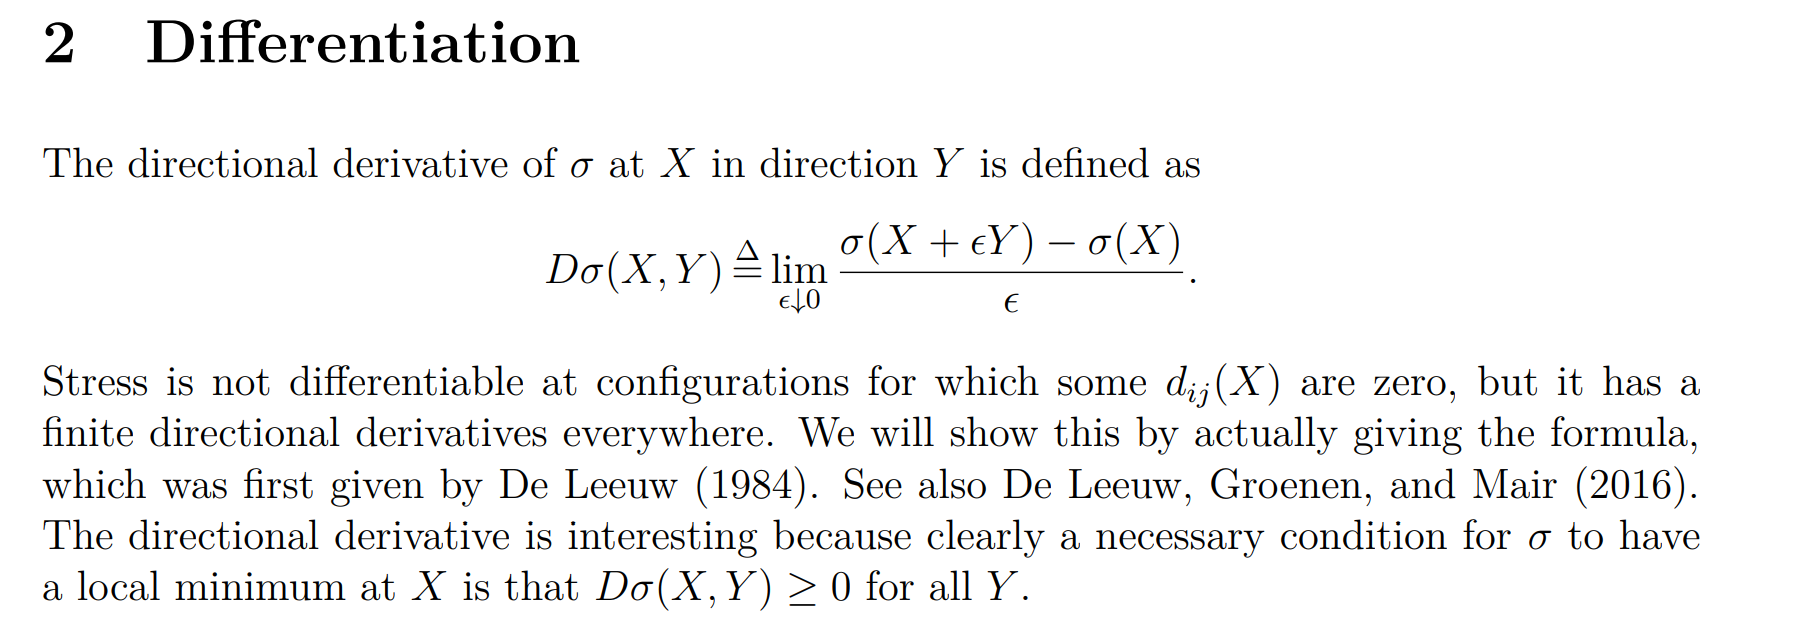
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

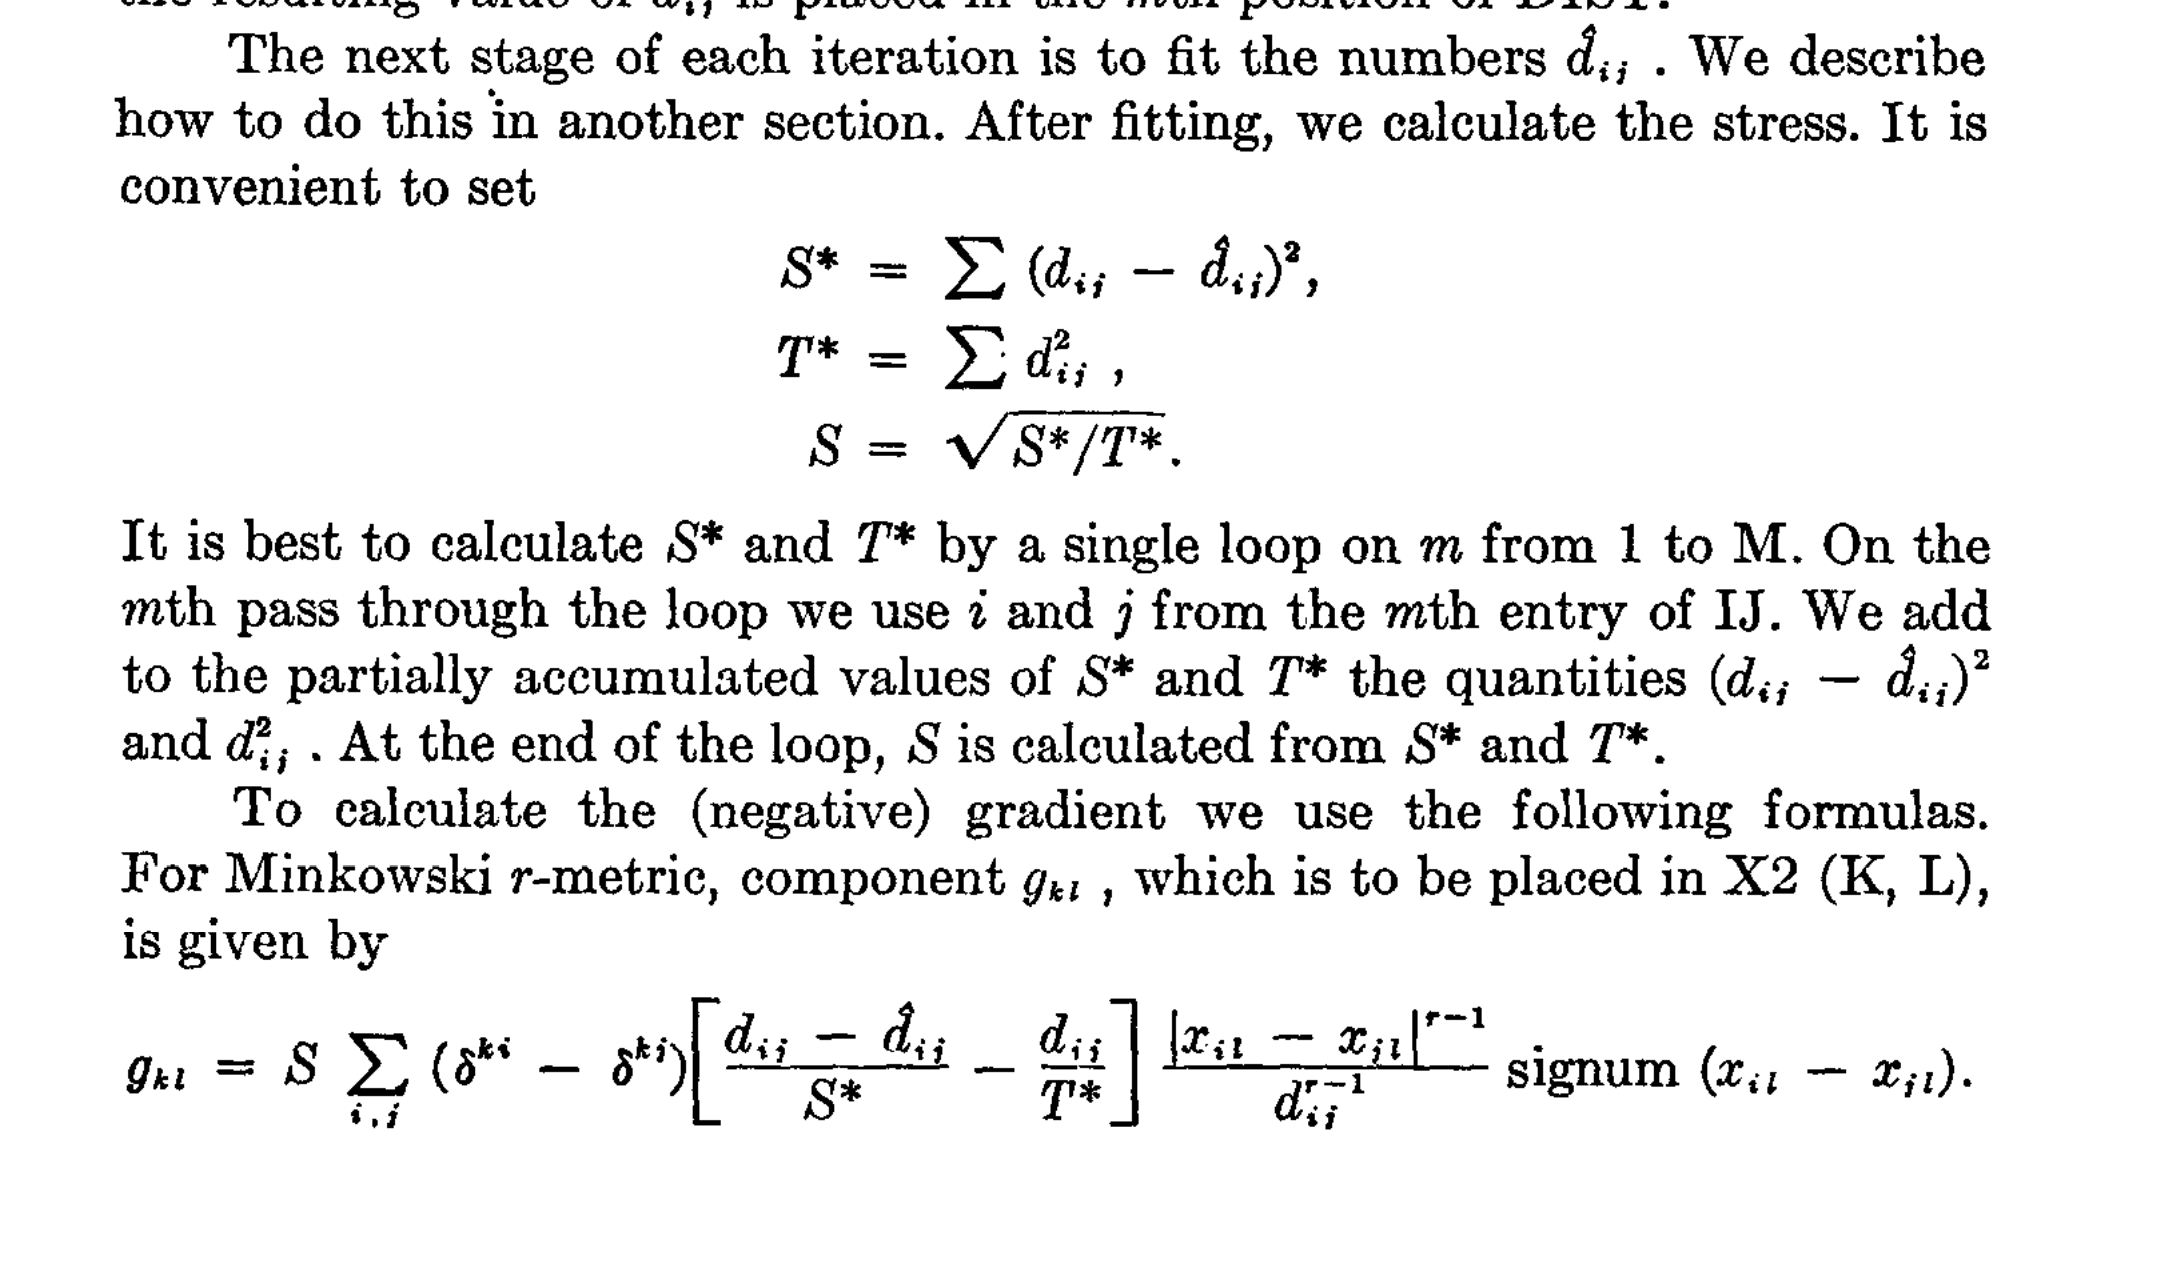
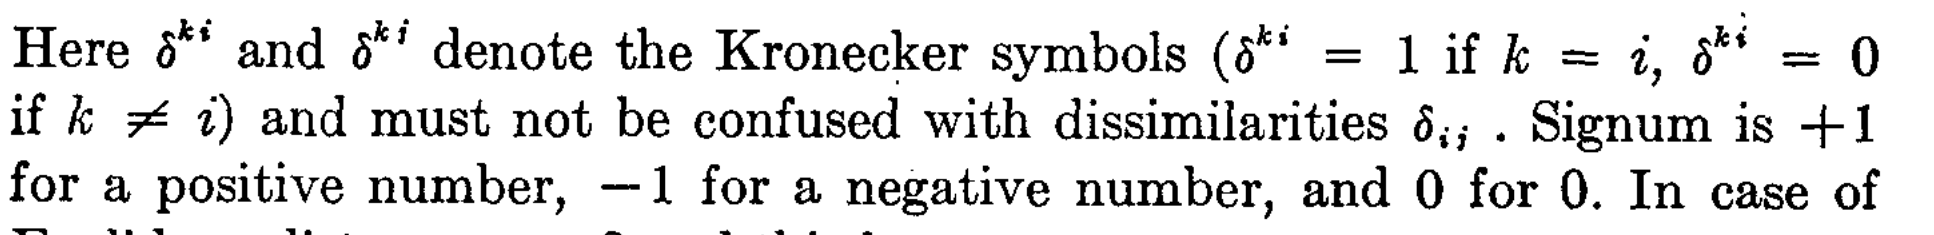
From Kruskal, 1964